# Fit 1
Simple fitting example (1-d histogram with an interpreted function)




**Author:** Rene Brun  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Thursday, August 29, 2019 at 01:27 AM.</small></i>

In [1]:
%%cpp -d
#include "TCanvas.h"
#include "TFrame.h"
#include "TBenchmark.h"
#include "TString.h"
#include "TF1.h"
#include "TH1.h"
#include "TFile.h"
#include "TROOT.h"
#include "TError.h"
#include "TInterpreter.h"
#include "TSystem.h"
#include "TPaveText.h"

In [2]:
TCanvas *c1 = new TCanvas("c1_fit1","The Fit Canvas",200,10,700,500);
c1->SetGridx();
c1->SetGridy();
c1->GetFrame()->SetFillColor(21);
c1->GetFrame()->SetBorderMode(-1);
c1->GetFrame()->SetBorderSize(5);

gBenchmark->Start("fit1");

 We connect the ROOT file generated in a previous tutorial
 (see <a href="fillrandom.C.nbconvert.ipynb">Filling histograms with random numbers from a function</a>) 

In [3]:
TString dir = gROOT->GetTutorialDir();
dir.Append("/fit/");
TFile *file = TFile::Open("fillrandom.root");
if (!file) {
   gROOT->ProcessLine(Form(".x %s../hist/fillrandom.C",dir.Data()));
   file = TFile::Open("fillrandom.root");
   if (!file) return;
}

Error in <TFile::TFile>: file fillrandom.root does not exist


fillrandom: Real Time =   0.08 seconds Cpu Time =   0.07 seconds


 The function "ls()" lists the directory contents of this file

In [4]:
file->ls();

TFile**		fillrandom.root	
 TFile*		fillrandom.root	
  KEY: TFormula	form1;1	abs(sin(x)/x)
  KEY: TF1	sqroot;1	x*gaus(0) + [3]*form1
  KEY: TH1F	h1f;1	Test random numbers


 Get object "sqroot" from the file. Undefined objects are searched
 for using gROOT->FindObject("xxx"), e.g.:
 TF1 *sqroot = (TF1*) gROOT.FindObject("sqroot")

In [5]:
TF1 * sqroot = 0;
file->GetObject("sqroot",sqroot);
if (!sqroot){
   Error("fit1.C","Cannot find object sqroot of type TF1\n");
   return;
}
sqroot->Print();

Formula based function:     sqroot 
               sqroot : x*gaus(0) + [3]*form1 Ndim= 1, Npar= 4, Number= 0 
 Formula expression: 
	x*[p0]*exp(-0.5*((x-[p1])/[p2])*((x-[p1])/[p2]))+[p3]*(abs(sin(x)/x)) 


 Now get and fit histogram h1f with the function sqroot

In [6]:
TH1F* h1f = 0;
file->GetObject("h1f",h1f);
if (!h1f){
   Error("fit1.C","Cannot find object h1f of type TH1F\n");
   return;
}
h1f->SetFillColor(45);
h1f->Fit("sqroot");

 FCN=198.935 FROM MIGRAD    STATUS=CONVERGED     148 CALLS         149 TOTAL
                     EDM=2.98567e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           3.31658e+01   5.45703e-01   3.00376e-03  -1.11540e-03
   2  p1           4.00667e+00   1.65304e-02   9.48491e-05  -3.06425e-02
   3  p2           9.84663e-01   1.28238e-02   6.05976e-05  -3.04244e-02
   4  p3           6.34464e+01   1.33233e+00   8.77483e-03  -3.96109e-04


We now annotate the picture by creating a pavetext object
 and displaying the list of commands in this macro

In [7]:
TPaveText * fitlabel = new TPaveText(0.6,0.4,0.9,0.75,"NDC");
fitlabel->SetTextAlign(12);
fitlabel->SetFillColor(42);
fitlabel->ReadFile(Form("%sfit1_C.txt",dir.Data()));
fitlabel->Draw();
c1->Update();
gBenchmark->Show("fit1");

fit1      : Real Time =   1.05 seconds Cpu Time =   0.65 seconds


Draw all canvases 

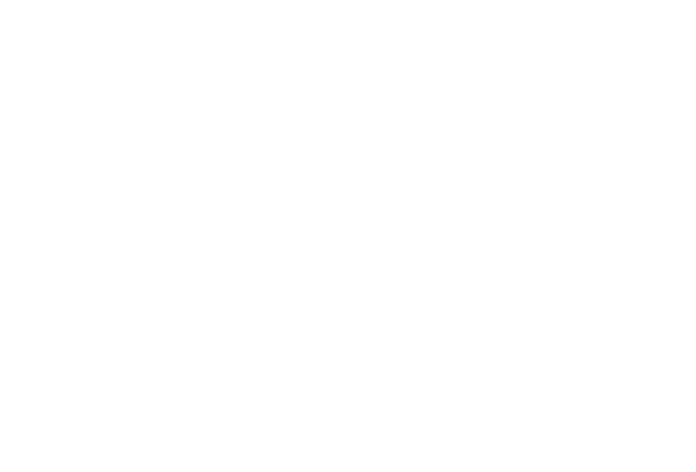

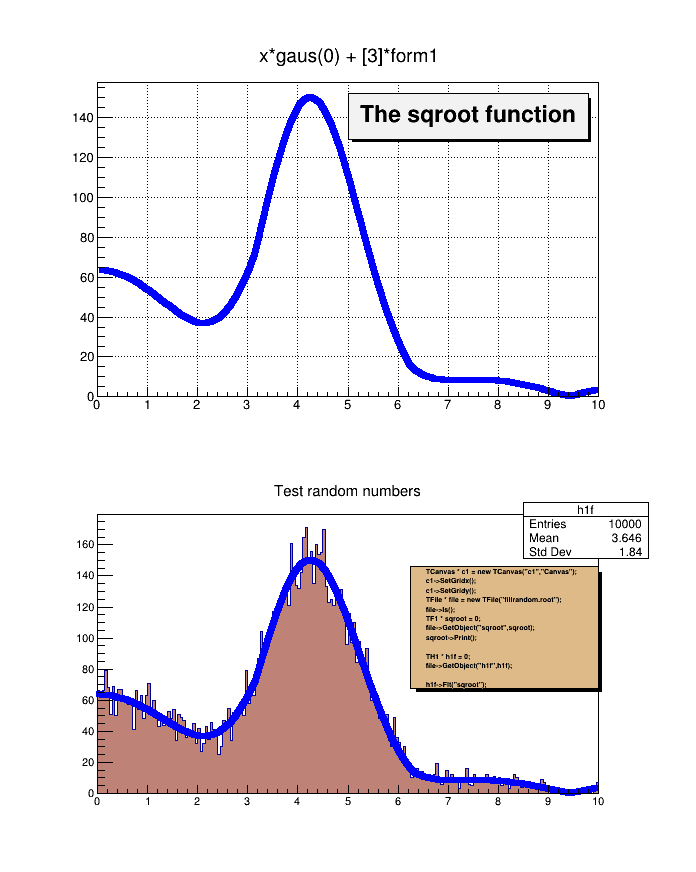

In [8]:
gROOT->GetListOfCanvases()->Draw()